# Download [zip_code_market_tracker.tsv000](https://www.kaggle.com/datasets/thuynyle/redfin-housing-market-data?select=zip_code_market_tracker.tsv000)

In [18]:
import polars as pl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [19]:
!awk -F'\t' 'BEGIN {OFS="\t"} {NF=58; print}' zip_code_market_tracker.tsv000 > cleaned_data.tsv

In [20]:
charlotte_df = pl.scan_csv("cleaned_data.tsv", separator="\t").filter(
    (pl.col("parent_metro_region")  == 'Charlotte, NC') & 
    (pl.col("property_type") == 'All Residential'))

In [21]:
# Select final features
features_to_keep = [
    # Identifiers
    'period_begin', 'period_end', 'region', 'state_code',
    
    # Target
    'median_sale_price',
    
    # Core features (Tier 1)
    'median_list_price', 'median_ppsf',
    'homes_sold', 'inventory', 'new_listings', 'months_of_supply',
    'median_dom', 'pending_sales',
    'avg_sale_to_list', 'sold_above_list',
    'price_drops', 'off_market_in_two_weeks',
    
    # Pre-calculated trends (Tier 1)
    'median_sale_price_mom', 'median_sale_price_yoy',
    'months_of_supply_mom', 'months_of_supply_yoy',
    
    # Additional momentum (Tier 2)
    'homes_sold_mom', 'homes_sold_yoy',
    'inventory_mom', 'inventory_yoy',
    'median_dom_mom', 'median_dom_yoy',
    'price_drops_mom', 'price_drops_yoy',
    'pending_sales_mom', 'pending_sales_yoy',
    'new_listings_mom', 'new_listings_yoy',
]

# Filter and select
charlotte_clean = charlotte_df.select(features_to_keep)
# clean region zip code format
charlotte_clean = charlotte_clean.with_columns(
    pl.col("region").str.replace_all("Zip Code: ", "")
)

In [22]:
# Save
charlotte_clean = charlotte_clean.collect()
charlotte_clean.write_csv("charlotte_cleaned_data.csv")

In [23]:
!rm cleaned_data.tsv

In [24]:
charlotte_clean.head(10)

period_begin,period_end,region,state_code,median_sale_price,median_list_price,median_ppsf,homes_sold,inventory,new_listings,months_of_supply,median_dom,pending_sales,avg_sale_to_list,sold_above_list,price_drops,off_market_in_two_weeks,median_sale_price_mom,median_sale_price_yoy,months_of_supply_mom,months_of_supply_yoy,homes_sold_mom,homes_sold_yoy,inventory_mom,inventory_yoy,median_dom_mom,median_dom_yoy,price_drops_mom,price_drops_yoy,pending_sales_mom,pending_sales_yoy,new_listings_mom,new_listings_yoy
str,str,str,str,f64,f64,f64,i64,i64,i64,str,f64,i64,f64,f64,str,f64,f64,f64,str,str,f64,f64,f64,f64,f64,f64,str,str,f64,f64,f64,f64
"""2015-12-01""","""2016-02-29""","""29706""","""SC""",111000.0,82500.0,66.41572,6,29,20,null,67.5,null,1.006592,0.166667,null,0.0,-0.647619,1.773267,null,null,1.0,0.0,0.035714,0.611111,-47.5,-278.5,null,null,null,null,0.176471,0.666667
"""2013-02-01""","""2013-04-30""","""28625""","""NC""",125500.0,139900.0,69.139194,75,274,141,null,132.5,null,0.931266,0.16,null,0.0,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
"""2021-04-01""","""2021-06-30""","""28281""","""NC""",1.0975e6,340000.0,479.339833,2,5,3,null,184.5,null,0.933881,0.0,null,1.0,0.0,2.276119,null,null,0.0,-0.6,-0.166667,0.666667,0.0,128.5,null,null,null,null,0.0,0.5
"""2021-01-01""","""2021-03-31""","""28081""","""NC""",240000.0,225000.0,135.663294,110,53,125,null,38.0,null,0.993465,0.336364,null,0.457143,0.014799,0.352113,null,null,-0.051724,0.170213,0.06,-0.417582,-9.0,-28.0,null,null,null,null,0.22549,0.0
"""2019-04-01""","""2019-06-30""","""28117""","""NC""",373500.0,386255.0,136.935276,382,496,430,null,77.0,null,0.976071,0.109948,null,0.197183,0.071736,-0.03861,null,null,0.026882,0.02965,0.066667,-0.07635,-4.0,9.0,null,null,null,null,0.007026,-0.122449
"""2018-12-01""","""2019-02-28""","""28079""","""NC""",269000.0,292700.0,120.096077,137,155,168,null,63.0,null,0.987213,0.175182,null,0.289474,0.035811,0.093496,null,null,-0.061644,0.045802,0.115108,0.230159,17.0,0.0,null,null,null,null,0.112583,0.244444
"""2021-07-01""","""2021-09-30""","""29710""","""SC""",380000.0,389900.0,163.94498,349,155,255,null,36.0,null,1.00581,0.43553,null,0.414286,0.013786,0.086025,null,null,-0.002857,0.191126,-0.066265,-0.301802,-0.5,-20.0,null,null,null,null,-0.059041,-0.229607
"""2016-01-01""","""2016-03-31""","""29732""","""SC""",167094.0,175000.0,93.216962,208,292,268,null,70.5,null,0.970848,0.182692,null,0.018868,0.012691,0.055886,null,null,0.130435,0.061224,0.073529,-0.153623,-13.0,-21.0,null,null,null,null,0.282297,0.015152
"""2018-04-01""","""2018-06-30""","""28034""","""NC""",185000.0,169950.0,86.952039,89,55,66,null,71.5,null,0.990276,0.269663,null,0.083333,-0.008256,0.090384,null,null,0.141026,0.618182,-0.246575,-0.112903,-54.5,-42.5,null,null,null,null,-0.029412,0.118644


shape: (33, 3)
┌──────────────────────────────┬───────────────┬─────────────┐
│ column                       ┆ missing_count ┆ missing_pct │
│ ---                          ┆ ---           ┆ ---         │
│ str                          ┆ u32           ┆ f64         │
╞══════════════════════════════╪═══════════════╪═════════════╡
│ months_of_supply_missing     ┆ 11765         ┆ 100.0       │
│ pending_sales_missing        ┆ 11765         ┆ 100.0       │
│ price_drops_missing          ┆ 11765         ┆ 100.0       │
│ months_of_supply_mom_missing ┆ 11765         ┆ 100.0       │
│ months_of_supply_yoy_missing ┆ 11765         ┆ 100.0       │
│ …                            ┆ …             ┆ …           │
│ state_code_missing           ┆ 0             ┆ 0.0         │
│ median_sale_price_missing    ┆ 0             ┆ 0.0         │
│ median_ppsf_missing          ┆ 0             ┆ 0.0         │
│ homes_sold_missing           ┆ 0             ┆ 0.0         │
│ sold_above_list_missing      ┆ 0      

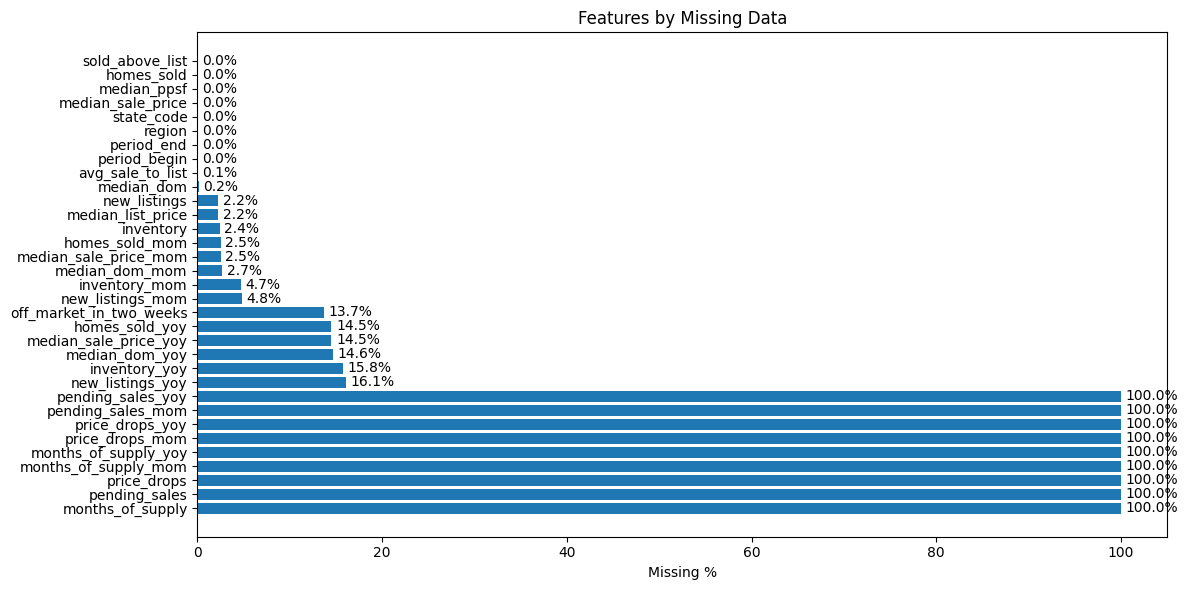

Zips with FULL coverage (30+ quarters): 113 - suitable for LSTM
Zips with PARTIAL coverage (15-29 quarters): 8
Zips with LIMITED coverage (<15 quarters): 10


/tmp/ipykernel_1724/1932384237.py:27: DeprecationWarning: `pl.count()` is deprecated. Please use `pl.len()` instead.
(Deprecated in version 0.20.5)
  pl.count().alias('quarters'),


In [29]:
df = pl.read_csv('charlotte_cleaned_data.csv')

# ========== MISSING DATA BY FEATURE ==========
missing_df = df.select([
    pl.all().null_count().name.suffix('_missing')
]).transpose(include_header=True, column_names=['missing_count'])
missing_df = missing_df.with_columns([
    (pl.col('missing_count') / len(df) * 100).alias('missing_pct')
]).sort('missing_pct', descending=True)
print(missing_df)

# Plot missing data
fig, ax = plt.subplots(figsize=(12, 6))
missing_pct = [(col, df[col].null_count() / len(df) * 100) for col in df.columns]
missing_pct = sorted(missing_pct, key=lambda x: x[1], reverse=True)
ax.barh([x[0] for x in missing_pct], [x[1] for x in missing_pct])
for i, (col, pct) in enumerate(missing_pct):
    ax.text(pct + 0.5, i, f"{pct:.1f}%", va='center')
ax.set_xlabel('Missing %')
ax.set_title('Features by Missing Data')
plt.tight_layout()
plt.show()


# ========== TIME COVERAGE ANALYSIS ==========
time_coverage = df.group_by('region').agg([
    pl.count().alias('quarters'),
    pl.col('period_begin').min().alias('first_quarter'),
    pl.col('period_begin').max().alias('last_quarter'),
    pl.col('median_sale_price').null_count().alias('missing_prices')
]).sort('quarters', descending=True)

print(f"Zips with FULL coverage (30+ quarters): {len(time_coverage.filter(pl.col('quarters') >= 30))} - suitable for LSTM")
print(f"Zips with PARTIAL coverage (15-29 quarters): {len(time_coverage.filter((pl.col('quarters') >= 15) & (pl.col('quarters') < 30)))}")
print(f"Zips with LIMITED coverage (<15 quarters): {len(time_coverage.filter(pl.col('quarters') < 15))}")

complete_zips = time_coverage.filter(pl.col('quarters') >= 30)['region'].to_list()

In [27]:
df = pl.read_csv('charlotte_cleaned_data.csv')

# ========== STEP 1: DROP EMPTY COLUMNS ==========
empty_columns = [
    'months_of_supply', 'pending_sales', 'price_drops',
    'months_of_supply_mom', 'months_of_supply_yoy',
    'price_drops_mom', 'price_drops_yoy',
    'pending_sales_mom', 'pending_sales_yoy',
]
df = df.drop(empty_columns)

# ========== STEP 2: FILL YoY WITH 0 ==========
yoy_columns = [
    'median_sale_price_yoy', 'homes_sold_yoy', 'inventory_yoy',
    'median_dom_yoy', 'new_listings_yoy',
]
for col in yoy_columns:
    df = df.with_columns(pl.col(col).fill_null(0))

# ========== STEP 3: FILL off_market_in_two_weeks ==========
median_omtw = df['off_market_in_two_weeks'].median()
df = df.with_columns(pl.col('off_market_in_two_weeks').fill_null(median_omtw))

# ========== STEP 4: FORWARD FILL + MEDIAN FOR SMALL GAPS ==========
small_missing = [
    'new_listings', 'median_list_price', 'inventory',
    'homes_sold_mom', 'median_sale_price_mom', 'median_dom_mom',
    'inventory_mom', 'new_listings_mom',
]

df = df.sort(['region', 'period_begin'])

for col in small_missing:
    df = df.with_columns(pl.col(col).forward_fill().over('region'))
    df = df.with_columns(pl.col(col).backward_fill().over('region'))
    df = df.with_columns(pl.col(col).fill_null(pl.col(col).median()))

# ========== STEP 5: FILL FINAL REMAINING ==========
df = df.with_columns([
    pl.col('median_dom').fill_null(pl.col('median_dom').median()),
    pl.col('avg_sale_to_list').fill_null(pl.col('avg_sale_to_list').median()),
])

# ========== STEP 6: VERIFY ==========
total_missing = df.select([pl.all().null_count()]).sum_horizontal()[0]
print(f"\n✅ Total missing values: {total_missing}")

# ========== SAVE ==========
df.write_csv('charlotte_final_clean.csv')



✅ Total missing values: 0
